In [34]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from tqdm import tqdm
import math
import pickle
from argparse import Namespace
import os
import model

torch.manual_seed(3407)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3801,))]
)

trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform
)
testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=32, shuffle=True
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=32, shuffle=False
)
net = model.TransMLP(64, 4)
net = net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=5e-4)

In [36]:
len(trainset)

60000

In [27]:
image, label = next(iter(trainloader))
loss = []

In [28]:
for _ in range(1000):
    optimizer.zero_grad()
    outputs = net(image)
    l = criterion(outputs, label)
    loss.append(l.item())
    l.backward()
    optimizer.step()

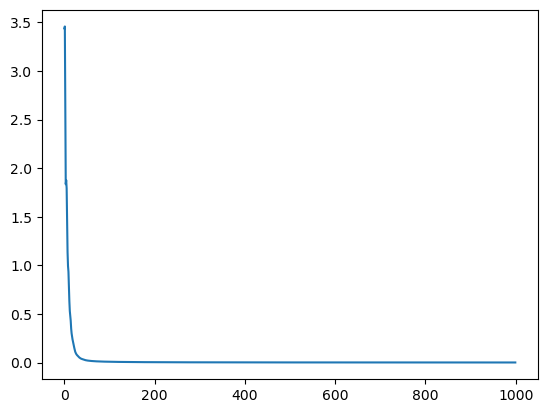

In [29]:
import matplotlib.pyplot as plt
plt.plot(loss)

In [30]:
loss[999]

0.0002738524926826358

In [ ]:
# TransMLP
# Width 64, depth 3 -> 0.00018375417857896537 after 1000 epochs
# Width 64, depth 4 -> 0.000265001057414338 after 1000 epochs
# Width 64, depth 2 -> 0.0004785330093000084 after 1000 epochs


# ResMLP
# Width 64, depth 1 -> 0.0003370283520780504 after 1000 epochs
# Width 64, depth 2 -> 0.00323467212729156 after 1000 epochs